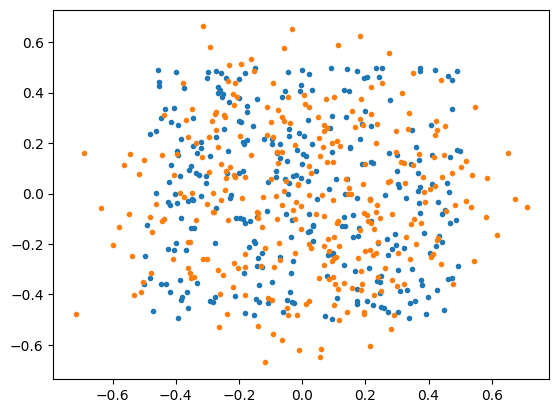

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def leapFrog(r,p,R,dt):
    rnorm = np.zeros([np.size(r[0,:])]);
    for i in range(np.size(r[0,:])):
        rnorm[i] = np.linalg.norm(r[:,i]-R)**2;
    r = r + p*dt;
    p = p - rnorm*(r-R)*dt;
    return r,p

# General parameters
N = 300;
dt = 0.01;
t = np.arange(0,10,dt);
global r 
global p

R = np.zeros([3,1]);
r = np.zeros([3,N,len(t)])
p = np.zeros([3,N,len(t)])
r[:,:,0] = np.random.uniform(-0.5,0.5,(3, N)) #0: x,y,z 1:Number of particles, 2: at time t
p[:,:,0] = np.random.uniform(-0.5,0.5,(3, N))
for i in range(len(t)-1):
    r[:,:,i+1],p[:,:,i+1] = leapFrog(r[:,:,i],p[:,:,i],R,dt);

plt.plot(r[0,:,0],r[1,:,0],'.')
plt.plot(r[0,:,-1],r[1,:,-1],'.')


FileNotFoundError: [WinError 2] The system cannot find the file specified

Error in callback <function _draw_all_if_interactive at 0x00000279C0C92F80> (for post_execute):


ValueError: s must be a scalar, or float array-like with the same size as x and y

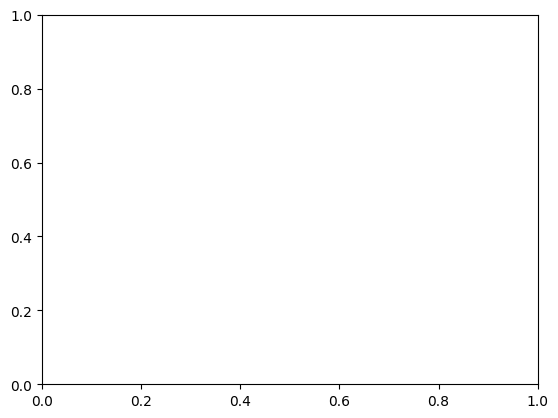

In [10]:
fig, ax = plt.subplots();

def update(i):
    ax.clear();
    ax.scatter(r[0,:,i],r[1,:,i],'.');
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

f = r"c://Users/Stefan/Desktop/animation.mp4"

ani = animation.FuncAnimation(fig, update,frames = np.arange(0, len(t), 1), interval = 33.3)
writervideo = animation.FFMpegWriter(fps=30) 
ani.save(f, writer=writervideo)